# Working with Networkx

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import networkx as nx

In [70]:
#empty graph


In [71]:
#add edges


In [72]:
#add nodes


In [73]:
#visualize 


### Built in Graphs

In [3]:
G = nx.karate_club_graph()

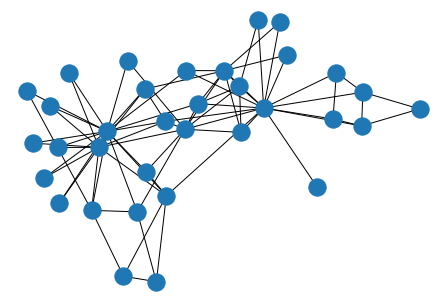

In [12]:
nx.draw(G, pos = nx.spring_layout(G))

In [14]:
list(G.nodes())[:5]

[0, 1, 2, 3, 4]

In [16]:
list(G.edges)[:5]

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]

In [18]:
G.node[0]

{'club': 'Mr. Hi'}

In [20]:
colors = ['red' if G.node[i]['club'] == 'Mr. Hi' else 'blue' for i in G.nodes()]

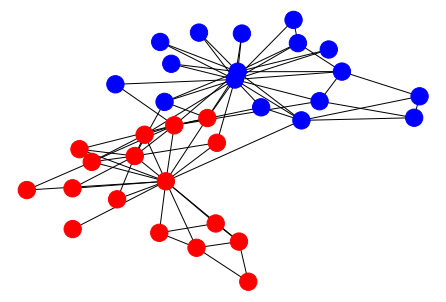

In [23]:
nx.draw(G, label = True, node_color = colors)

In [24]:
def tie_strength(G, v, w): 
    # Get neighbors of nodes v and w in G 
    v_neighbors = set(G.neighbors(v)) 
    w_neighbors = set(G.neighbors(w)) 
    # Return size of the set intersection 
    return 1 + len(v_neighbors & w_neighbors) 

In [26]:
# Calculate weight for each edge 
for v, w in G.edges: 
    G.edges[v, w]["weight"] = tie_strength(G, v, w) 
# Store weights in a list 
edge_weights = [G.edges[v, w]["weight"] for v, w in G.edges]

In [28]:
weighted_pos = nx.spring_layout(G, pos=nx.spring_layout(G), k=0.3, weight="weight")

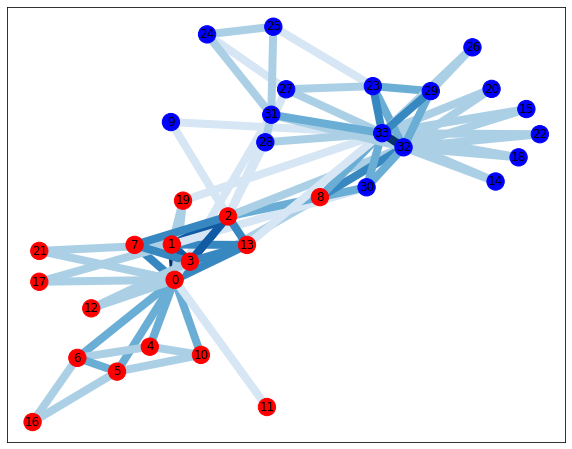

In [32]:
# Draw network with edge color determined by weight 
plt.figure(figsize = (10, 8))
nx.draw_networkx( 
    G, weighted_pos, width=8, node_color=colors, 
    edge_color=edge_weights, edge_cmap=plt.cm.Blues,
    edge_vmin=0, edge_vmax=6) 

### Graphs from files

In [37]:
F = nx.read_gexf('knect2008.gexf')

In [38]:
student_pos = nx.spring_layout(F, k = 1.5)

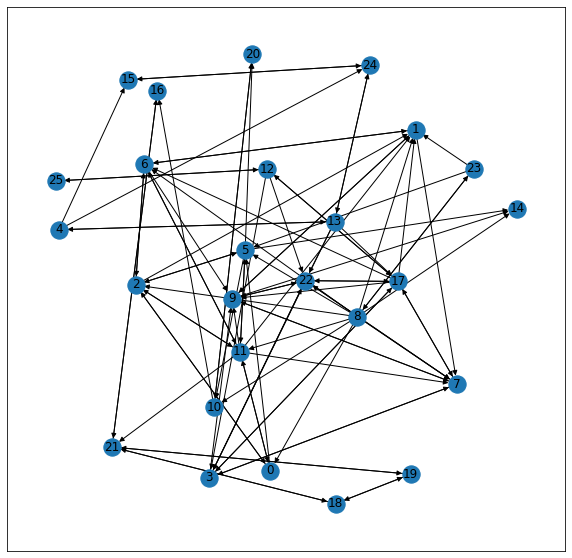

In [45]:
plt.figure(figsize = (10, 10))
nx.draw_networkx(F, pos = student_pos, arrowsize = 10,
                color = 'lightblue', linestyle = '--')

In [47]:
G = nx.read_edgelist('simpletext.txt')

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


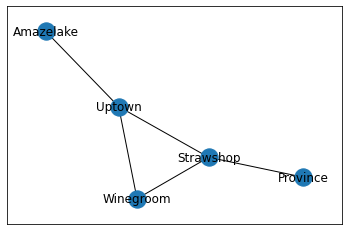

In [48]:
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.gca().margins(0.15, 0.15)

In [49]:
G = nx.read_edgelist('simpletext.txt', create_using = nx.DiGraph)

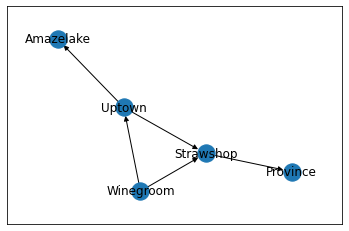

In [51]:
nx.draw_networkx(G, pos)
plt.gca().margins(0.15, 0.15)

In [52]:
# Read edge list

# Extract weights

# Draw network

##### Colors 

In [53]:
# Read edge list

# extract colors

# draw network



##### Adjacencies

In [54]:
# Read adjacency list

### Graphs from Code

In [63]:
from nltk.corpus import stopwords

In [65]:
# Ignore articles, pronouns, etc.
stop_words = set(stopwords.words('english'))

In [66]:
# This example uses regular expressions from the re package
import re
# Construct a network from a text
def co_occurrence_network(text):
    # Create a new network
    G = nx.Graph()
    # Split the text into sentences and iterate through them
    sentences = text.split('.')
    for s in sentences:
        # Remove punctuation and convert to lowercase
        clean = re.sub('[^\w\n ]+', '', s).lower()
        clean = re.sub('_+', '', clean).strip()
        # Create list of words separated by whitespace
        words = re.split('\s+', clean)
        # Create an edge for each pair of words
        for v in words:
            # Update word count, add node if necessary
            try:
                G.nodes[v]['count'] += 1
            except KeyError:
                G.add_node(v)
                G.nodes[v]['count'] = 1
            # Update edge count for each pair of words in this sentence
            for w in words:
                # Skip stop words
                if v == w or v in stop_words or w in stop_words:
                    continue
                # Skip blank space
                if len(v) == 0 or len(w) == 0:
                    continue
                # Add one to the edge's count
                try:
                    G.edges[v, w]['count'] += 1
                except KeyError:
                    # Edge doesn't exist, create it
                    G.add_edge(v, w, count=1)
    return G

In [67]:
# Read the text
with open('frankenstein.txt') as f:
    text = f.read()
# Create a network from the text
G = co_occurrence_network(text)

In [68]:
pairs = sorted(
    G.edges(data=True),
    key=lambda e: e[2]['count'],
    reverse=True)
pairs[0:10]

[('man', 'old', {'count': 68}),
 ('would', 'could', {'count': 54}),
 ('one', 'could', {'count': 50}),
 ('one', 'would', {'count': 48}),
 ('yet', 'one', {'count': 40}),
 ('country', 'native', {'count': 38}),
 ('man', 'one', {'count': 36}),
 ('one', 'might', {'count': 36}),
 ('every', 'one', {'count': 34}),
 ('nothing', 'could', {'count': 34})]

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


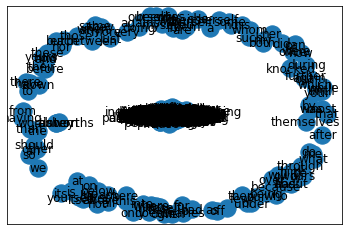

In [69]:
nx.draw_networkx(G)

In [ ]:
# Count co-occurrences for characters only

# Create list of edge counts


# Create spring layout


# Create figure and draw nodes

# Draw edges

# Draw labels
